In [212]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

#load the digits dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Split Test Set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.8, shuffle=False)

print(X_train.shape)

(60000, 28, 28)


6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 188
   48   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249 161
    7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3 152 235   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  58 254  79   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10 208 193   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  30 249  41   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 145 236 

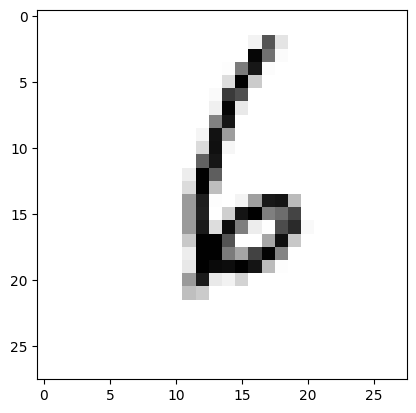

In [213]:
plt.imshow(X_train[388], cmap="Greys")
print(y_train[388])
print(X_train[388])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.09803922 0.7372549
  0.18823529 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

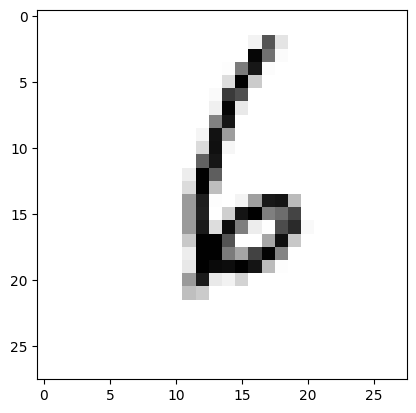

In [214]:
#Normalize X to range [0,1]
def normalize(X, min=0, max=255):
   X_norm = np.zeros(shape=X.shape)
   for idx0, image in enumerate(X):
      for idx1, row in enumerate(image):
         for idx2, pixel in enumerate(row):
            X_norm[idx0][idx1][idx2] = (pixel-min)/(max-min)
   return X_norm

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
X_val_norm = normalize(X_val)

print(X_train_norm[388])
plt.imshow(X_train_norm[388], cmap="Greys")


In [215]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#one-hot encode y
oh_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_oh = oh_enc.fit_transform(y_train.reshape(-1,1))
y_test_oh = oh_enc.transform(y_test.reshape(-1,1))
y_val_oh = oh_enc.transform(y_val.reshape(-1,1))

print(y_test_oh.shape)
pd.DataFrame( y_test_oh)

(8000, 10)


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [216]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=128, activation="relu" ,input_shape=X_train_norm.shape[1:]),  #TODO statt 28,28 -> 28*28
    layers.Dense(units=64, activation="relu"),
    layers.Flatten(),
    #Output
    layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [217]:
history = model.fit(
    X_train_norm, y_train_oh,
    validation_data=(X_test_norm, y_test_oh),
    batch_size=250,
    epochs=10,
)

Epoch 1/10
240/240 [==============================] - 3s 9ms/step - loss: 0.4657 - accuracy: 0.8758 - val_loss: 0.2231 - val_accuracy: 0.9376
Epoch 2/10
240/240 [==============================] - 2s 8ms/step - loss: 0.1780 - accuracy: 0.9473 - val_loss: 0.1557 - val_accuracy: 0.9529
Epoch 3/10
240/240 [==============================] - 2s 8ms/step - loss: 0.1422 - accuracy: 0.9572 - val_loss: 0.1386 - val_accuracy: 0.9585
Epoch 4/10
240/240 [==============================] - 2s 8ms/step - loss: 0.1240 - accuracy: 0.9634 - val_loss: 0.1287 - val_accuracy: 0.9613
Epoch 5/10
240/240 [==============================] - 2s 8ms/step - loss: 0.1136 - accuracy: 0.9659 - val_loss: 0.1257 - val_accuracy: 0.9639
Epoch 6/10
240/240 [==============================] - 2s 8ms/step - loss: 0.1060 - accuracy: 0.9682 - val_loss: 0.1178 - val_accuracy: 0.9649
Epoch 7/10
240/240 [==============================] - 2s 8ms/step - loss: 0.0982 - accuracy: 0.9707 - val_loss: 0.1174 - val_accuracy: 0.9645
Epoch 

In [218]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 28, 128)           3712      
                                                                 
 dense_31 (Dense)            (None, 28, 64)            8256      
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                                 
 dense_32 (Dense)            (None, 10)                17930     
                                                                 
Total params: 29898 (116.79 KB)
Trainable params: 29898 (116.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Minimum validation loss: 0.11188822239637375


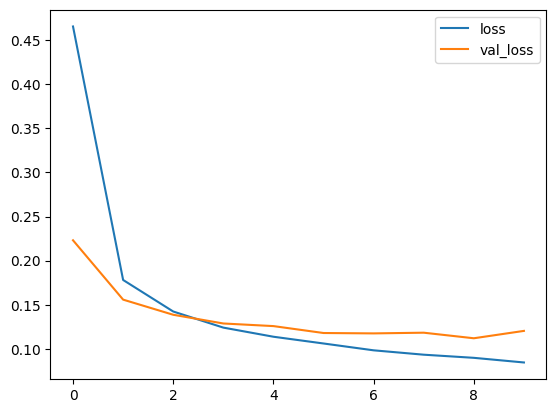

In [219]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [237]:
y_val_pred = oh_enc.inverse_transform(model.predict(X_val_norm))
#vgl. mit y_val

y_val_pred.shape
y_val.shape

df = pd.DataFrame()
df['y_val'] = y_val
df['y_pred'] = y_val_pred
df['equal'] = (df['y_val'] == df['y_pred'])
df

63/63 [==============================] - 0s 1ms/step


,y_val,y_pred,equal
0,4,4,True
1,9,9,True
2,9,9,True
3,7,7,True
4,1,1,True
...,...,...,...
1995,2,2,True
1996,3,3,True
1997,4,4,True
1998,5,5,True


In [240]:
df[df['equal']==False]

,y_val,y_pred,equal
12,8,6,False
20,1,6,False
59,2,1,False
61,4,9,False
91,2,8,False
94,2,8,False
95,4,9,False
272,3,5,False
277,3,5,False
279,8,4,False


Predicted Value: [9]


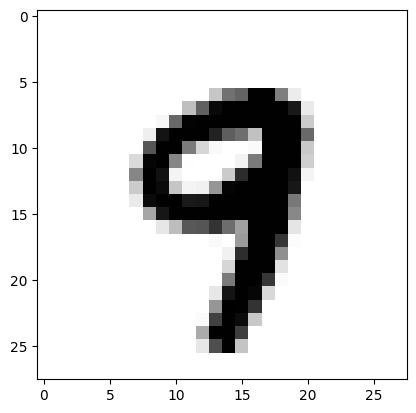

In [229]:
n = 1
print("Predicted Value: "+ str(y_val_pred[n]))
plt.imshow(X_val_norm[n], cmap="Greys")

In [222]:
#TODO's
#randomize X and Y in first cell
#accuracy bestimmen und aufschreiben, dann rumspielen mit: 
#input_shape=[28,28] bzw. [28*28]
#number of layers & number of units
#activation functions (relu vs ?)
#optimizer adam vs sgd, loss
#metrics
#dropout
#before/after normalizing: convert to tensors?
# normalizing vs batchNorm
#epochen höher + EarlyStopping